# Projet d'Analyse des Données

## Introduction

Salut tout le monde ! Je suis **Aymen RAMI** et aujourd'hui, je vais plonger dans un projet super intéressant : analyser comment les gens utilisent les applications mobiles. On va jouer avec des chiffres comme la durée d'utilisation (`Usage`), le nombre de notifications reçues (`Notifications`) et le nombre de fois où l'application a été ouverte (`Times opened`). 

Le but ? Découvrir si les notifications poussent vraiment les gens à ouvrir leur application plus souvent, si plus de temps d'utilisation veut dire plus de notifications, et quelles sont les journées les plus populaires pour ouvrir l'application. 

Bref, on va essayer de comprendre ce qui pousse les gens à devenir accros à leurs applis (ou pas !). Et qui sait, on pourrait même découvrir des secrets cachés dans ces données !

## Illustration

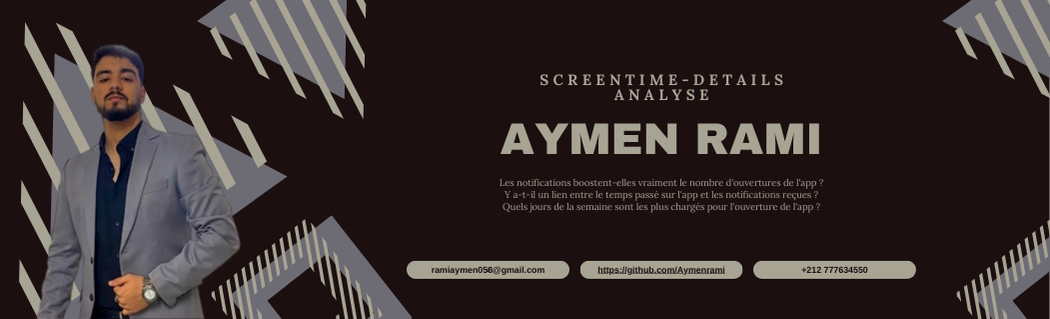


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from scipy import stats

In [2]:
df = pd.read_excel(r"C:\Users\Lenovo\Desktop\Project Aymen\Screentime-App-Details\DataSet\ScreentimeDataTronform.xlsx")
df.head()

,Date,Usage,Notifications,Times opened,App,DayOfWeek,Nom du jour,DayType
0,2022-08-26,38,70,49,Instagram,4,vendredi,NormalDay
1,2022-08-27,39,43,48,Instagram,5,samedi,WeekEnd
2,2022-08-28,64,231,55,Instagram,6,dimanche,WeekEnd
3,2022-08-29,14,35,23,Instagram,0,lundi,NormalDay
4,2022-08-30,3,19,5,Instagram,1,mardi,NormalDay


# Inspection des données : Un coup d'œil rapide !

Bon, alors on a regardé les données de plus près, voilà ce qu'on a trouvé :

## 1. **Des colonnes vides ?**

In [3]:
df.isna().sum()

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
DayOfWeek        0
Nom du jour      0
DayType          0
dtype: int64

# Résultat :
## Aucune colonne vide ! 
- Notre dataset est nickel chrome, pas besoin de s'inquiéter des valeurs manquantes

---
# 2. Valeurs dupliquées
## Deuxième vérification, est-ce qu'on a des doublons ?

In [4]:
df.duplicated().sum()

0

# Résultat :
## 0 doublons ! 
- Pas de données répétées, tout est unique et bien structuré. Franchement, c’est rare qu’on ait une data aussi clean dès le départ !

---
# 3. Infos sur les colonnes
## Un dernier coup d’œil sur les types de données et quelques statistiques générales :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           54 non-null     datetime64[ns]
 1   Usage          54 non-null     int64         
 2   Notifications  54 non-null     int64         
 3   Times opened   54 non-null     int64         
 4   App            54 non-null     object        
 5   DayOfWeek      54 non-null     int64         
 6   Nom du jour    54 non-null     object        
 7   DayType        54 non-null     object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.5+ KB


## Détails des colonnes :
- On a *54* lignes et *8* colonnes.
- Date : Format (`datetime64`), parfait pour les jours.
- Usage, Notifications, Times opened, DayOfWeek : Des (`int64`), donc des entiers.
- App, Nom du jour, DayType : (`Des object`), donc des chaînes de caractères.
# Mémoire utilisée :
- La mémoire est de 3.5 KB, très léger. Tout est prêt pour l’analyse !



In [6]:
df[['Usage','Notifications','Times opened']].describe().round(2)

,Usage,Notifications,Times opened
count,54.00,54.00,54.00
mean,65.04,117.70,61.48
std,58.32,97.02,43.84
min,1.00,8.00,2.00
25%,17.50,25.75,23.50
50%,58.50,99.00,62.50
75%,90.50,188.25,90.00
max,244.00,405.00,192.00


# Résumé des stats d'utilisation d'un utilisateur sur l'appli

Alors, voici ce qu'on peut dire sur **ce fameux utilisateur** :

## 1. **Usage (temps passé sur l'appli)**
- **Moyenne** : Notre utilisateur passe en moyenne **65 minutes** par jour sur l'appli. Pas mal, une petite heure à se balader dessus !
- **Écart-type** : Par contre, il est pas très régulier. Un jour il passe **2 minutes**, un autre il tape **4 heures** ! Un vrai yo-yo avec un écart de **58 minutes**.
- **Min-Max** : Le jour où il a fait le plus vite, c’était **1 minute**, et quand il s’y met vraiment, il peut rester jusqu'à **244 minutes** (presque 4 heures !).
- **Médiane** : La moitié du temps, il reste **58,5 minutes**. En gros, ça dépend de son mood !
- **IQR** : En moyenne, il passe entre **17,5 minutes** et **90,5 minutes** sur l'appli. Ça reste raisonnable, mais il a ses moments d’intensité.

---
---

## 2. **Notifications**
- **Moyenne** : Il reçoit environ **118 notifications** par jour. L'appli aime bien le harceler, faut croire !
- **Écart-type** : Ça varie pas mal aussi, avec un écart de **97 notifications**. Parfois, il est tranquille, d'autres fois il doit en avoir marre !
- **Min-Max** : Le jour où il a reçu le moins d'alertes, c’était **8**, et le pire qu'il a vécu, c’est **405 notifications**. Ça doit vibrer toutes les deux secondes chez lui !
- **IQR** : La majorité du temps, il reçoit entre **25,75** et **188,25 notifications**. C’est quand même beaucoup, non ?

---
---

## 3. **Times opened (nombre d'ouvertures)**
- **Moyenne** : Il ouvre l'appli environ **61 fois** par jour. Franchement, c'est pas mal, ça doit être son appli préférée !
- **Écart-type** : Là aussi, ça fluctue avec un écart de **43 ouvertures**. Certains jours, c’est juste pour vérifier, d'autres jours, il doit être collé à l'écran.
- **Min-Max** : Le jour le plus calme, il n'a ouvert l'appli que **2 fois**, mais un autre jour, il l'a ouverte **192 fois** ! On dirait qu’il était en mission !
- **IQR** : D’habitude, il ouvre l'appli entre **23,5 fois** et **90 fois** par jour. En gros, il est assez accro !

---
---

Bref, notre utilisateur a une relation bien spéciale avec son appli. Un coup il est cool, un coup il devient accro... mais bon, on le comprend !
is bon, on le comprend !


# **Analyse Boxplot : Usage, Notifications et Ouvertures de l'appli**


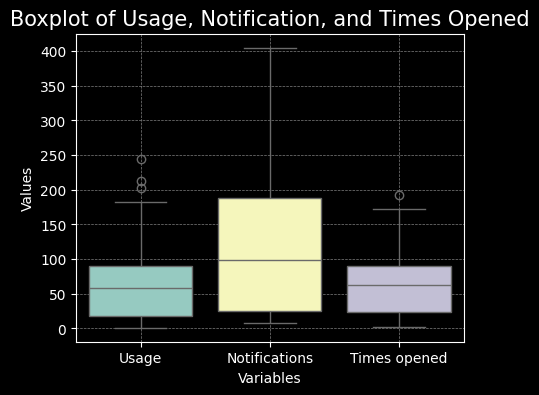

In [50]:
plt.style.use('dark_background')
plt.figure(figsize=(5, 4))  
sns.boxplot(data = df[['Usage', 'Notifications', 'Times opened']])
plt.title('Boxplot of Usage, Notification, and Times Opened', fontsize=15)
plt.ylabel('Values')
plt.xlabel('Variables')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

- **Usage** : Pour ce qui est de l'**Usage**, on observe quelques valeurs qui se détachent, mais rien de trop inquiétant. L'utilisateur semble avoir un usage relativement constant de l'application, avec seulement quelques jours où il dépasse un peu la moyenne.

- **Notifications** : Les **Notifications**, par contre, montrent une grande variation. Il y a des jours où il reçoit énormément d'alertes. Les valeurs extrêmes indiquent clairement que l'utilisateur est parfois submergé de notifications.

- **Times opened (Ouvertures de l'appli)** : En ce qui concerne le nombre de fois que l'appli est ouverte, on retrouve un comportement plutôt stable
avec quelques exceptions. L'utilisateur a une certaine régularité dans l'ouverture de l'appli.

## Valeurs Aberrantes : On Décrypte Ça ! 

- L'usage de l'application et les ouvertures restent assez réguliers, avec de légères variations.
- En revanche, le volume des notifications semble être bien plus irrégulier, avec des jours où l'utilisateur reçoit une avalanche d'alertes.

Quand on regarde les données pour **Usage**, **Notifications**, et **Times Opened**, on tombe sur quelques chiffres qui sortent de l’ordinaire. Pas de souci, ce ne sont pas des erreurs, mais des comportements des utilisateurs qui sont... un peu extrêmes ! 

### Conclusion :
Ces valeurs un peu folles montrent des comportements d’utilisateurs très engagés. Elles sont rares mais bien réelles, et elles nous donnent des infos super utiles sur quand et pourquoi l’appli est tellement populaire. Donc, on garde tout ça comme un précieux trésor dans nos données !

---


# Analyse de la Distribution des Données : À la recherche de la normalité ! 



## **Analyse de la Distribution des Usage** : 

## 1. *Test de Shapiro-Wilk*

In [8]:
stat , p_value = stats.shapiro(df['Usage'])
print(f'Statistic: {stat}, P-value: {p_value}')
alpha = 0.05
if p_value > alpha:
    print("Usage suit une distribution normale (ne pas rejeter H0)")
else:
    print("Usage ne suit pas une distribution normale (rejeter H0)")

Statistic: 0.8908424613607382, P-value: 0.00013915878822707187
Usage ne suit pas une distribution normale (rejeter H0)


On a fait le test Shapiro-Wilk pour voir si notre `Usage` se comporte comme une loi normale. Verdict :
- **P-value** : <0.05, ce qui veut dire que notre distribution est **un peu rebelle** et ne suit pas la loi normale. On va devoir lui faire un cours de rattrapage !


## 2. *Histogramme*

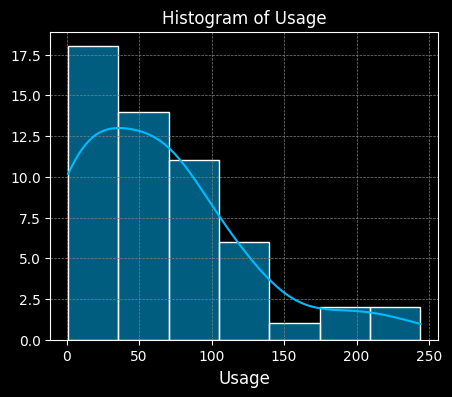

In [9]:
plt.style.use('dark_background')
plt.figure(figsize = (5,4))
sns.histplot(data=df, x='Usage', kde=True, color='#00bbff')
plt.title('Histogram of Usage')
plt.xlabel('Usage', fontsize=12, color='white')
plt.ylabel('') 
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()


L'histogramme de `Usage` ressemble plus à une montagne russe qu'à une cloche de Gauss. On voit clairement que les données ne sont pas bien réparties autour de la moyenne. On peut dire que la distribution n’est pas vraiment normale – elle a décidé de sortir des sentiers battus !

## 3. *Q-Q Plot*

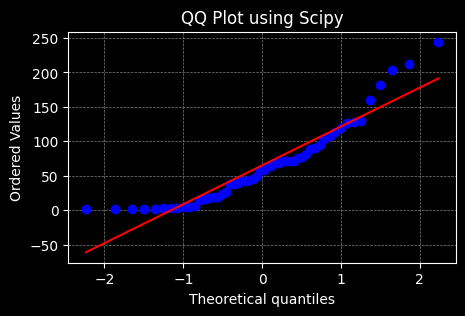

In [52]:
data = df['Usage']
plt.figure(figsize = (5,3))
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot using Scipy')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()


Le Q-Q plot nous montre que nos données ont du mal à suivre la ligne droite, comme un élève qui refuse de rester en rang. Les points dansent un peu trop autour de la ligne, confirmant que notre distribution de `Usage` n'est pas aussi normale qu'on l'aurait espéré.

# Conclusion
En gros, la distribution de notre temps d'utilisation de l'appli ne suit pas la norme. On pourrait envisager de passer à des méthodes non paramétriques ou de donner un petit coup de pouce à nos données pour les rendre plus conformes.

---
## **Analyse de la Distribution des Notifications :**

## 1. *Test de Shapiro-Wilk*

In [11]:
stat , p_value = stats.shapiro(df['Notifications'])
print(f'Statistic: {stat}, P-value: {p_value}')
alpha = 0.05
if p_value > alpha:
    print("Notifications suit une distribution normale (ne pas rejeter H0)")
else:
    print("Notifications ne suit pas une distribution normale (rejeter H0)")

Statistic: 0.8971360544816724, P-value: 0.00022619660585823005
Notifications ne suit pas une distribution normale (rejeter H0)



On a fait le test Shapiro-Wilk pour vérifier si la distribution des `Notifications` suit une loi normale. Résultat :
- **P-value** : <0.05, ce qui indique que la distribution des notifications **ne suit pas une loi normale**. Elle a l'air d'aimer le changement !


## 2. *Histogramme*

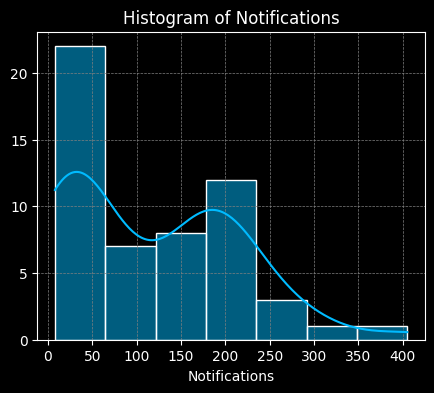

In [12]:
plt.style.use('dark_background')
plt.figure(figsize = (5,4))
sns.histplot(data=df, x='Notifications', kde=True, color='#00bbff')
plt.title('Histogram of Notifications')
plt.xlabel('Notifications')
plt.ylabel('') 
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

L'histogramme des notifications montre une distribution plutôt fluctuante. On observe un graphique qui monte et descend, comme une vague. Cela signifie que la répartition des notifications est loin d'être uniforme et ne suit pas la courbe normale classique.

## 3. *Q-Q Plot*

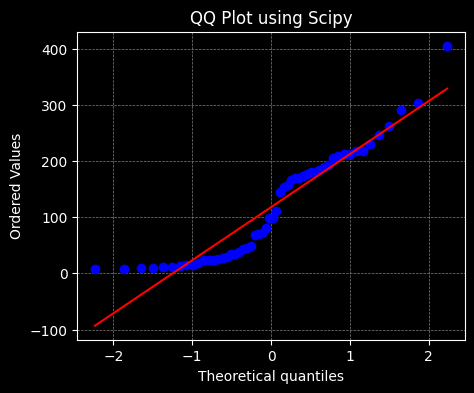

In [13]:
dataN = df['Notifications']
plt.figure(figsize = (5,4))
stats.probplot(dataN, dist="norm", plot=plt)
plt.title('QQ Plot using Scipy')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

Le Q-Q plot révèle également ces fluctuations. Les points ne suivent pas la ligne droite de manière cohérente, ce qui confirme que la distribution des notifications est **loin de la normalité** et présente des variations notables.

# Conclusion
En résumé, la distribution des notifications n'est pas normale, comme le montre l'histogramme ondulant et le Q-Q plot. Des méthodes non paramétriques pourraient être plus adaptées pour analyser ces données de manière plus précise.

---
# Analyse de la Distribution des Ouvertures de l'Appli (Times Opened) 🕒 

## 1. *Test de Shapiro-Wilk*

In [14]:
stat , p_value = stats.shapiro(df['Times opened'])
print(f'Statistic: {stat}, P-value: {p_value}')
alpha = 0.05
if p_value > alpha:
    print("Time Opened suit une distribution normale (ne pas rejeter H0)")
else:
    print("Time Opened ne suit pas une distribution normale (rejeter H0)")

Statistic: 0.9446765882900827, P-value: 0.014673485769288475
Time Opened ne suit pas une distribution normale (rejeter H0)


*
On a lancé un test de Shapiro-Wilk pour voir si le nombre de fois où l’appli est ouverte suit une distribution normale. Résultat :
- **Statistique** : 0.9447
- **P-value** : 0.0147

Vu que la **p-value est inférieure à 0.05**, on peut dire avec certitude que `Times Opened` ne suit **pas une distribution normale**. Ça va dans tous les tout ça ! 😄


## 2. *Histogramme*

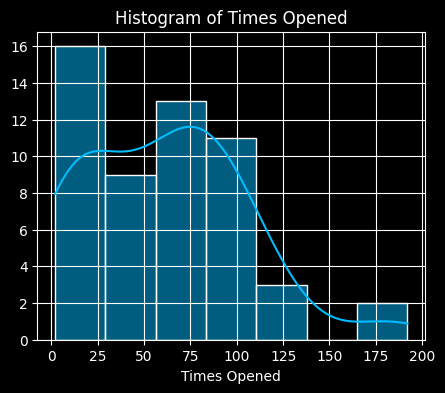

In [15]:
plt.style.use('dark_background')
plt.figure(figsize = (5,4))
sns.histplot(data=df, x='Times opened', kde=True, color='#00bbff')
plt.title('Histogram of Times Opened')
plt.xlabel('Times Opened')
plt.ylabel('') 
plt.grid(True)

En regardant l'histogramme, on a un joli mélange de vagues : ça monte, ça descend, puis ça remonte pour retomber ensuite. Pas vraiment ce qu’on attendrait d’une distribution normale bien propre. On peut dire que notre utilisateur ouvre l'appli avec un certain *style*... ou du moins, un rythme bien irrégulier !


## 3. *QQ Plot* 


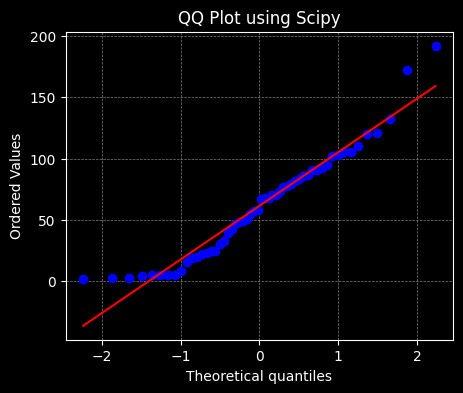

In [16]:
dataTO = df['Times opened']
plt.figure(figsize = (5,4))
stats.probplot(dataTO, dist="norm", plot=plt)
plt.title('QQ Plot using Scipy')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

Quand on passe au QQ plot, c'est encore plus clair. Si `Times Opened` suivait une belle distribution normale, les points seraient bien alignés sur la diagonale. Mais là, on a des points qui se baladent, s'éloignent, puis reviennent. Clairement, **pas de normalité** ici !


## 2. **Conclusion**
Notre cher utilisateur semble ouvrir l’appli de manière un peu imprévisible. Pas de normalité ici, donc il va falloir se pencher sur des analyses non paramétriques pour mieux comprendre ce comportement aléatoire.

En bref, l’ouverture de l'appli c'est un peu comme son humeur : parfois il clique tout le temps, parfois il la laisse tranquille... mais c'est clair qu'il n'y a rien de très "normal" dans tout ça !

---

# Résumé des Résultats d'Analyse

Bon, après avoir creusé un peu dans les données, voilà ce qu'on peut dire :

1. **Temps passé sur l'appli (Usage)**  
Le temps que l'utilisateur passe sur l'appli n'est clairement pas régulier. Le **test de Shapiro** et les graphiques (histogramme et QQ plot) montrent que ça ne suit pas du tout une distribution normale. Il y a des jours où l'utilisateur ne fait qu'un petit tour rapide, et d'autres où il se perd dessus pendant des heures.

2. **Notifications**  
Pareil pour les notifications : c'est le bazar. L'histogramme est tout en vagues et le **QQ plot** confirme que ça part un peu dans tous les sens. L'utilisateur reçoit un nombre de notifications super irrégulier, entre des journées tranquilles et d'autres où son téléphone ne doit pas arrêter de sonner.

3. **Nombre d'ouvertures (Times Opened)**  
Le nombre de fois où l'utilisateur ouvre l'appli est tout aussi imprévisible. Les analyses montrent que ça ne suit pas un schéma normal, avec des jours où il ouvre l'appli deux fois et d'autres où il passe sa journée à la checker.

### Conclusion  
En gros, l'utilisateur n'a pas vraiment de routine avec l'appli. Que ce soit pour l'utilisation, les notifications ou les ouvertures, tout est plutôt aléatoire et change d'un ur à l'autre.


---

# **Corrélation entre Usage, Notifications et Times Opened**

## Pourquoi la corrélation de Kendall ?

Vu que nos données ne suivent pas une distribution normale (merci les tests Shapiro !), il fallait utiliser un test qui marche mieux dans ce genre de situations. Du coup, on a choisi **la corrélation de Kendall**, qui est plus adaptée aux distributions bizarres comme les nôtres. Comme ça, on est sûr de pas tirer de conclusions foireuses ! 


In [17]:
corr_kendall = df[['Usage' ,'Notifications','Times opened']].corr(method='kendall')
corr_kendall

,Usage,Notifications,Times opened
Usage,1.000000,0.636878,0.748237
Notifications,0.636878,1.000000,0.694094
Times opened,0.748237,0.694094,1.000000


## Analyse des corrélations avec heatmap 


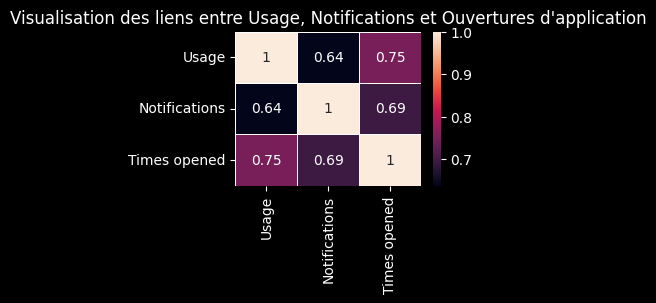

In [18]:
plt.figure(figsize=(3,2))
sns.heatmap(data=corr_kendall, annot=True, linewidths=0.5)
plt.title("Visualisation des liens entre Usage, Notifications et Ouvertures d'application")
plt.show()

Bon, j'ai fait une petite analyse pour voir comment ces trois éléments sont liés : **le temps passé sur l'appli** (Usage), **le nombre de notifications reçues** (Notifications), et **le nombre de fois où l’appli est ouverte** (Times Opened).

- **Usage et Notifications** : Ils ont une corrélation positive de `0.64`. En gros, plus tu passes de temps sur l’appli, plus tu te fais bombarder de notifications. Un peu logique, non ? 

- **Usage et Times Opened** : Là, la corrélation monte à `0.75`. Donc, si tu ouvres souvent l’appli, tu vas y passer encore plus de temps. Genre, l’appli devient ton meilleur ami. 

- **Notifications et Times Opened** : Ils sont liés aussi à `0.69`. Chaque notification semble être une invitation à rouvrir l’appli. Tu reçois une alerte, et hop, tu craques et tu rouvres.

---

# **Analyse des Relations Linéaires entre Usage, Notifications et Times Opened**

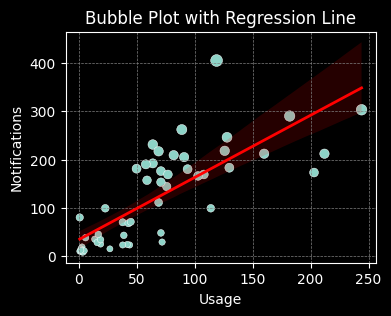

In [48]:
plt.figure(figsize = (4,3))
sns.scatterplot(data = df , x='Usage' , y='Notifications' ,legend=None, size="Notifications")
sns.regplot(data=df, x='Usage', y='Notifications', scatter=False, color='red', line_kws={'linewidth': 2})
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.title('Bubble Plot with Regression Line')
plt.xlabel('Usage')
plt.ylabel('Notifications')
plt.show()

1. **Usage et Notifications** :
   On observe une relation linéaire assez nette entre le nombre de notifications reçues et le temps passé sur l'application (Usage). En d'autres termes, plus vous recevez de notifications, plus vous passez de temps sur l'appli. C'est comme si les notifications disaient : "Allez, encore un petit tour sur l'appli !"

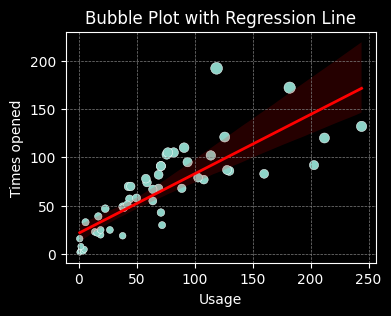

In [49]:
plt.figure(figsize = (4,3))
sns.scatterplot(data = df , x='Usage' , y='Times opened' ,legend=None, size="Times opened")
sns.regplot(data=df, x='Usage', y='Times opened', scatter=False, color='red', line_kws={'linewidth': 2})
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.title('Bubble Plot with Regression Line')
plt.xlabel('Usage')
plt.ylabel('Times opened')
plt.show()

2. **Usage et Times Opened** :
   La relation entre le temps passé sur l'application (Usage) et le nombre d'ouvertures (Times Opened) est également très marquée. En gros, plus vous ouvrez souvent l'appli, plus vous y passez du temps. Les utilisateurs qui ne peuvent pas se passer de leur appli sont souvent ceux qui y passent le plus de temps.

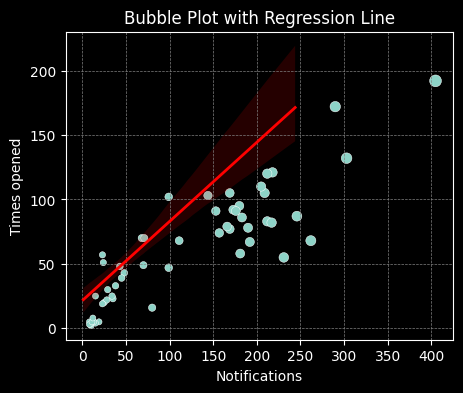

In [47]:
plt.figure(figsize = (5,4))
sns.scatterplot(data = df , x='Notifications' , y='Times opened' ,legend=None, size="Notifications")
sns.regplot(data=df, x='Usage', y='Times opened', scatter=False, color='red', line_kws={'linewidth': 2})
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.title('Bubble Plot with Regression Line')
plt.xlabel('Notifications')
plt.ylabel('Times opened')
plt.show()

3. **Notifications et Times Opened** :
   On note aussi une relation linéaire significative entre le nombre de notifications reçues et le nombre d'ouvertures de l'application. Chaque nouvelle notification semble être un petit rappel pour ouvrir l'appli encore une fois. On pourrait presque dire que les notifications sont des invitations à revisiter l'appli, comme des rappels insistants d’un ami qui veut qu’on l’accompagne à une fête ! 

## Conclusion
Pour résumer, voici ce que nous avons découvert :
- **Le nombre de notifications** et **le temps passé sur l'application** : Plus vous recevez de notifications, plus vous êtes tenté de passer du temps sur l'appli.
- **Le temps passé sur l'application** et **le nombre d'ouvertures de l'application** : Plus vous ouvrez l'appli, plus vous passez de temps dessus. Il semble que l'appli devienne un compagnon de plus en plus fidèle !
- **Le nombre de notifications** et **le nombre d'ouvertures de l'application** : Plus vous recevez de notifications, plus vous avez envie d'ouvrir l'appli. Les notifications jouent donc un rôle clé dans l'engagement.

En conclusion, les notifications et les ouvertures de l'application sont des éléments clés pour comprendre comment et pourquoi les utilisateurs passent du temps sur l'appli. Les notifications semblent être de bons "boosters" pour garder les utilisateurs engagés !